In [11]:
from model import * 
from train_model import * 
from sklearn.datasets import make_moons
import umap


def pi(s):
    return torch.clamp(s, 0.0, 1.0)

class ExternalWorld:
    def __init__(self, x_values, y_values):
        self.x = torch.tensor(x_values, dtype=torch.float32)
        self.y = torch.tensor(y_values, dtype=torch.int64)
        self.size_dataset = len(self.x)


x, y = make_moons(n_samples=10000, noise=0.01, random_state=42)
moon_world = ExternalWorld(x, y)

ModuleNotFoundError: No module named 'umap'

Epoch 1/100 | E=-0.69 C=0.00000 Error=0.00%:   1%|          | 1/100 [00:00<00:52,  1.89epoch/s]

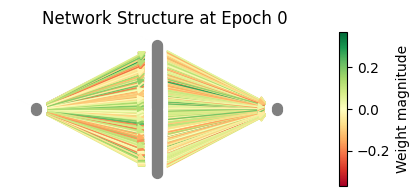

Epoch 25/100 | E=-0.91 C=0.00000 Error=0.00%:  25%|██▌       | 25/100 [00:13<00:38,  1.95epoch/s]

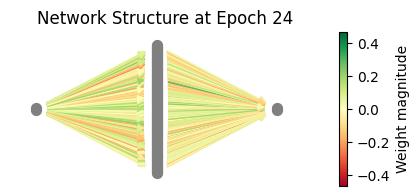

Epoch 50/100 | E=-0.93 C=0.00000 Error=0.00%:  50%|█████     | 50/100 [00:26<00:25,  1.95epoch/s]

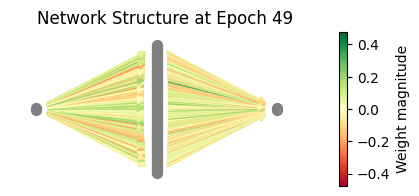

Epoch 75/100 | E=-0.93 C=0.00000 Error=0.00%:  75%|███████▌  | 75/100 [00:40<00:12,  1.95epoch/s]

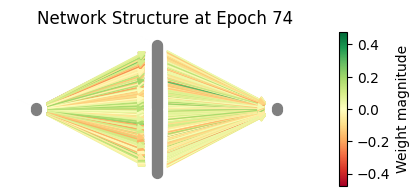

Epoch 100/100 | E=-0.94 C=0.00000 Error=0.00%: 100%|██████████| 100/100 [00:53<00:00,  1.94epoch/s]

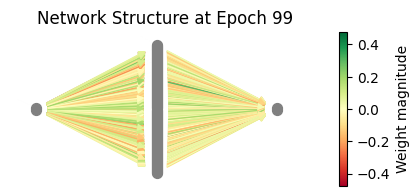

Epoch 100/100 | E=-0.94 C=0.00000 Error=0.00%: 100%|██████████| 100/100 [00:54<00:00,  1.85epoch/s]


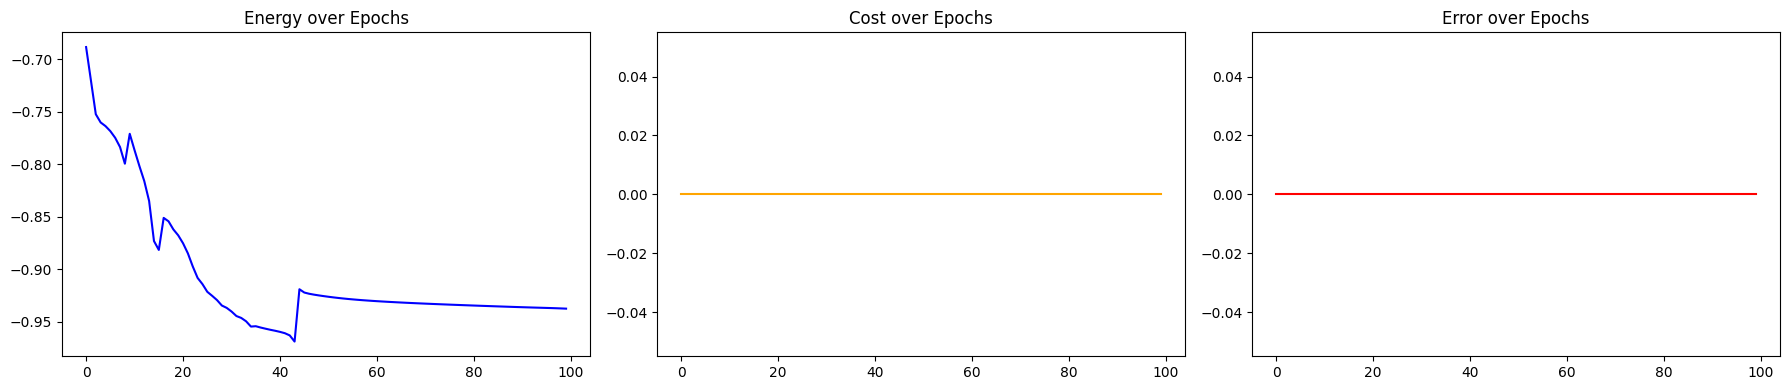

In [2]:
moon_net = Network(
    name="moon_net",
    external_world=moon_world,
    hyperparameters={
        "hidden_sizes": [128],
        "output_size": 2,
        "batch_size": 4,
        "n_epochs": 100,
        "n_it_neg": 10,
        "n_it_pos": 10,
        "alphas": [np.float32(0.1), np.float32(0.1)]
    }
)

# Train the network
train_net(moon_net, plot_graph= True)

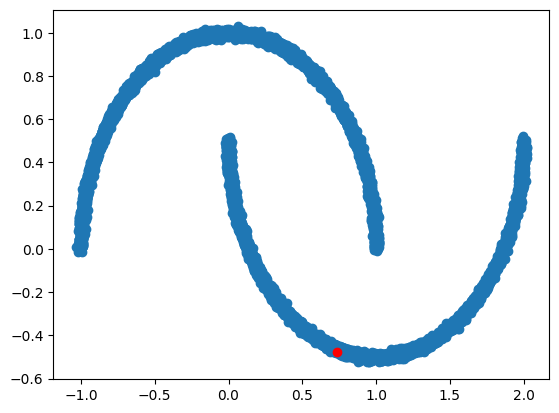

In [3]:
test_ind = 300

x_ten = torch.tensor(x[test_ind,:], dtype=torch.float32).unsqueeze(0)
plt.scatter(x[:,0], x[:,1])
plt.scatter(x[test_ind,0], x[test_ind,1], c='red')



In [12]:
h_eq = []

for i in range(np.shape(x)[0]):
    x_ten = torch.tensor(x[test_ind,:], dtype=torch.float32).unsqueeze(0)
    moon_net.load_x(x_ten)
    traj = moon_net.inference(100, 0.1)[-1]
    h_eq.append(traj[1].numpy())

h_eq = np.squeeze(np.array(h_eq))
print(h_eq.shape)
    

(10000, 128)


In [6]:

    test_ind = 300

x_ten = torch.tensor(x[test_ind,:], dtype=torch.float32).unsqueeze(0)

moon_net.load_x(x_ten)
traj = moon_net.inference(100, 0.1)[-1]
print(traj[1].numpy())

[[0.16998842 0.         0.19527544 0.         0.         0.
  0.19618553 0.22421312 0.         0.         0.         0.00536782
  0.         0.01197576 0.12554672 0.14055909 0.         0.29190236
  0.02639604 0.3212551  0.21839488 0.         0.00947459 0.2497563
  0.36173734 0.         0.         0.162618   0.23123208 0.15771174
  0.         0.00478659 0.09753064 0.11806332 0.         0.2338521
  0.         0.31889975 0.14298727 0.         0.12281741 0.0801185
  0.21421395 0.21745233 0.07358988 0.         0.         0.
  0.         0.         0.3666453  0.         0.23545268 0.
  0.         0.19450766 0.3154783  0.00578337 0.         0.
  0.         0.0780926  0.         0.18143244 0.06166916 0.
  0.13750786 0.         0.         0.03298961 0.10111059 0.22500305
  0.6283073  0.         0.04285135 0.34045485 0.17178348 0.09804066
  0.40481374 0.10682218 0.17910212 0.18561128 0.11497533 0.
  0.         0.         0.25204954 0.14012364 0.         0.
  0.02197063 0.         0.01694898 0.27